In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import PIL
from keras import layers
from keras.models import Model
from keras.layers import Input, Activation, Dense, Conv2D, Flatten, ZeroPadding2D, BatchNormalization
from keras.layers import MaxPooling2D, AveragePooling2D, Dropout, GlobalMaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array
from random import seed 
from random import randint

Using TensorFlow backend.


In [2]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import keras.backend as K
K.set_image_data_format('channels_last')
from PIL import Image

(2062, 64, 64)
(2062, 10)


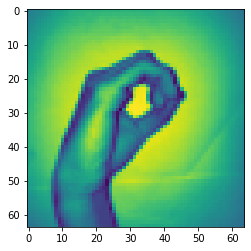

In [3]:
X_train = np.load('X.npy')
plt.imshow(X_train[260])
print(X_train.shape)
Y_train = np.load('Y.npy')
print(Y_train.shape)

<p style = "text-align: center">The dataset that I have used in my project has the following preview where first image to last shows 0-9 respectively</p>
<img src = "project_snip.png"/>
<p style = "text-align: center">But the dataset was mislabeled as we can see below. It should be noted that at this point the data is totally unshuffled</p>

Label for image 900:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Label for image 901:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


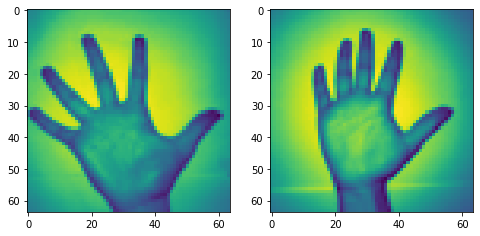

In [4]:
fig = plt.figure(figsize = (8,8))
fig.add_subplot(121)
plt.imshow(X_train[2000])#plot of image 900
fig.add_subplot(122)
plt.imshow(X_train[2001])#plot of image 901
print("Label for image 900: ", Y_train[2000])
print("Label for image 901: ", Y_train[2001])

<p style = "text-align: center">As you can see from above the data is totally unshuffled. Luckily two images of the same category had the same mislabelled labels </p>

In [5]:
Y = np.zeros((2062, 10))
for i in range(0, Y_train.shape[0]):
    if np.argmax(Y_train[i]) == 0:
        Y[i, 9] = 1.
    if np.argmax(Y_train[i]) == 1:
        Y[i, 0] = 1.
    if np.argmax(Y_train[i]) == 2: 
        Y[i, 7] = 1.
    if np.argmax(Y_train[i]) == 3:
        Y[i, 6] = 1.
    if np.argmax(Y_train[i]) == 4:
        Y[i, 1] = 1.
    if np.argmax(Y_train[i]) == 5:
        Y[i, 8] = 1.
    if np.argmax(Y_train[i]) == 6:
        Y[i, 4] = 1.
    if np.argmax(Y_train[i]) == 7:
        Y[i, 3] = 1.
    if np.argmax(Y_train[i]) == 8:
        Y[i, 2] = 1.
    if np.argmax(Y_train[i]) == 9:
        Y[i, 5] = 1.
Y_train = Y
print(np.argmax(Y_train[2000]))

5


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


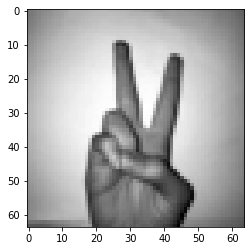

In [6]:
np.random.seed(1)
m = X_train.shape[0]
permutation = list(np.random.permutation(m))
X_train = X_train[permutation, :]
Y_train = Y_train[permutation, :]
plt.imshow(X_train[900], cmap = 'gray')
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
cv2.imshow("New Image", X_train[900])
cv2.waitKey(0)
cv2.destroyAllWindows()
print(Y_train[900])

In [7]:
def recog_model(input_shape):
    X_input = Input(input_shape)
    
    X = Conv2D(20, (7,7), strides = (2,2), name = 'conv_1')(X_input)
    X = BatchNormalization(axis = 3, name = 'bn_1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2), strides = None, name = 'mp_1')(X)
    
    X = Conv2D(50, (3,3), strides = (1,1), name = 'conv_2')(X)
    X = BatchNormalization(axis = 3, name = 'bn_2')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2), strides = None, name = 'mp_2')(X)
    
    X = Conv2D(100, (2,2), strides = (1,1), name = 'conv_3')(X)
    X = BatchNormalization(axis = 3, name = 'bn_3')(X)
    X = Activation('relu')(X)
    
    X = Flatten()(X)
    X = Dense(20, activation = 'relu', name = 'fc_1')(X)
    X = Dense(10, activation = 'softmax', name = 'output')(X)
    
    model = Model(inputs = X_input, outputs = X, name = 'base_model')
    return model

In [8]:
base_model = recog_model(X_train.shape[1:])
base_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
base_model.fit(X_train, Y_train, batch_size = 64, epochs = 10, validation_split = 0.3)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1443 samples, validate on 619 samples
Epoch 1/10
1443/1443 [==============================] - 7s 5ms/step - loss: 1.6690 - acc: 0.4151 - val_loss: 2.2872 - val_acc: 0.3700
Epoch 2/10
1443/1443 [==============================] - 4s 3ms/step - loss: 0.8031 - acc: 0.7609 - val_loss: 0.8400 - val_acc: 0.7367
Epoch 3/10
1443/1443 [==============================] - 4s 3ms/step - loss: 0.4059 - acc: 0.9009 - val_loss: 0.7749 - val_acc: 0.7512
Epoch 4/10
1443/1443 [==============================] - 5s 3ms/step - loss: 0.2087 - acc: 0.9591 - val_loss: 0.6562 - val_acc: 0.7964
Epoch 5/10
1443/1443 [==============================] - 4s 3ms/step - loss: 0.1161 - acc: 0.9848 - val_loss: 0.4087 - val_acc: 0.8772
Epoch 6/10
1443/1443 [==============================] - 4s 3ms/step - loss: 0.0668 - acc: 0.9938 - val_loss: 0.3438 - val_acc: 0.8918
Epoch 7/10
1443/1443 [==============================]

In [ ]:
X = cv2.imread('test1.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow("New Image", X)
cv2.waitKey(0)
cv2.destroyAllWindows()
img_r = cv2.resize(X, (64, 64))
G0 = np.array(img_r)
G1 = G0.reshape((64, 64, 1))
G = np.expand_dims(G1, axis = 0)

print(np.argmax(base_model.predict(G)))

Stream = cv2.VideoCapture(0)
while(Stream.isOpened()):
    ret, frame = Stream.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    img = cv2.rectangle(gray, (0, 100), (300, 350), (0), 0)
    crop_image = frame[0:300, 100:350]
    c_gray = cv2.cvtColor(crop_image, cv2.COLOR_BGR2GRAY)
    img_r = cv2.resize(c_gray, (64, 64))
    G0 = np.array(img_r)
    G2 = G0.reshape((64, 64, 1))
    G = np.expand_dims(G2, axis = 0)
    cv2.imshow("abc", c_gray)
    print(np.argmax(base_model.predict(G)))
    #hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
    
    #mask = cv2.inRange(hsv, np.array([2, 0, 0]), np.array([20, 255, 255]))
    
    #kernel = np.ones((5, 5))
    
    #dilation = cv2.dilate(blur2, kernel, iterations = 1)
    #erosion = cv2.erode(dilation, kernel, iterations = 1)
    
    #filtered = cv2.GaussianBlur(erosion, (3, 3), 0)
    
    #ret, thresh = cv2.threshold(filtered, 0, 255, 0)
    
    
    
    #cv2.imshow("1",blur)
    #cv2.imshow("jh", mask)
    
    
    if cv2.waitKey(1) == ord('q'):
        break

Stream.release()
cv2.destroyAllWindows()